# LINEAR REGRESSION

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("E:/DATA SCIENCE/jan/stock.csv")
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,1.12.17,79.75,81.00,78.20,78.85,79.468121,84508,413,6715692,27668.0,32.74,2.80,-0.90
1,2.12.17,80.00,80.00,78.10,78.25,78.417136,26121,203,2048334,17436.0,66.75,1.90,-1.75
2,3.12.17,78.00,78.35,77.00,77.50,77.819159,37016,308,2880554,17710.0,47.84,1.35,-0.50
3,4.12.17,77.75,78.30,77.00,77.35,77.717529,37926,257,2947515,21573.0,56.88,1.30,-0.40
4,5.12.17,77.85,80.60,77.00,78.55,79.504552,141599,1023,11257765,36238.0,25.59,3.60,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,3.5.21,37.35,38.00,34.80,36.20,36.131030,5942129,12648,214695244,2266352.0,38.14,3.20,-1.15
1250,4.5.21,36.05,37.20,34.10,34.95,35.255090,5621854,12013,198198968,1535627.0,27.32,3.10,-1.10
1251,5.5.21,35.10,38.15,33.10,33.90,36.166200,8883397,18328,321278716,1953520.0,21.99,5.05,-1.20
1252,6.5.21,35.00,35.85,32.15,32.65,33.242979,6211952,12842,206503790,2127960.0,34.26,3.70,-2.35


In [5]:
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,1.12.17,79.75,81.00,78.2,78.85,79.468121,84508,413,6715692,27668.0,32.74,2.80,-0.90
1,2.12.17,80.00,80.00,78.1,78.25,78.417136,26121,203,2048334,17436.0,66.75,1.90,-1.75
2,3.12.17,78.00,78.35,77.0,77.50,77.819159,37016,308,2880554,17710.0,47.84,1.35,-0.50
3,4.12.17,77.75,78.30,77.0,77.35,77.717529,37926,257,2947515,21573.0,56.88,1.30,-0.40
4,5.12.17,77.85,80.60,77.0,78.55,79.504552,141599,1023,11257765,36238.0,25.59,3.60,0.70


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       1254 non-null   object 
 1   Open Price                 1254 non-null   float64
 2   High Price                 1254 non-null   float64
 3   Low Price                  1254 non-null   float64
 4   Close Price                1254 non-null   float64
 5   WAP                        1254 non-null   float64
 6   No.of Shares               1254 non-null   int64  
 7   No. of Trades              1254 non-null   int64  
 8   Total Turnover (Rs.)       1254 non-null   int64  
 9   Deliverable Quantity       1247 non-null   float64
 10  % Deli. Qty to Traded Qty  1247 non-null   float64
 11  Spread High-Low            1254 non-null   float64
 12  Spread Close-Open          1254 non-null   float64
dtypes: float64(9), int64(3), object(1)
memory usage:

In [9]:
df.isnull().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         7
% Deli. Qty to Traded Qty    7
Spread High-Low              0
Spread Close-Open            0
dtype: int64

In [11]:
df.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1.254000e+03,1254.000000,1.254000e+03,1.247000e+03,1247.000000,1254.000000,1254.000000
mean,29.042871,29.576531,28.420335,28.890255,28.983602,8.211201e+05,1706.479266,2.165634e+07,3.392007e+05,46.199158,1.156196,-0.152616
std,19.351266,19.658580,19.036442,19.294214,19.353981,2.091222e+06,3222.730084,7.520261e+07,8.454506e+05,15.130654,1.190874,1.019602
min,10.350000,10.850000,10.040000,10.210000,10.377715,3.341000e+03,39.000000,1.361240e+05,1.316000e+03,2.300000,0.140000,-15.650000
25%,17.800000,18.050000,17.450000,17.700000,17.785262,5.355425e+04,279.250000,1.446659e+06,2.500500e+04,35.055000,0.500000,-0.457500
50%,20.550000,21.000000,20.150000,20.500000,20.541441,1.871305e+05,687.000000,4.947749e+06,8.180400e+04,45.360000,0.800000,-0.150000
75%,31.000000,31.450000,30.337500,30.787500,30.893676,7.406592e+05,1753.250000,1.462891e+07,2.878440e+05,56.020000,1.350000,0.150000
max,87.000000,88.050000,82.400000,87.100000,85.199112,2.510526e+07,33057.000000,1.311627e+09,1.061585e+07,98.510000,15.650000,11.700000


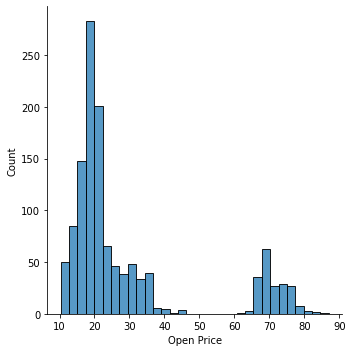

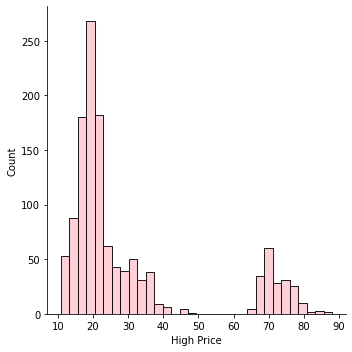

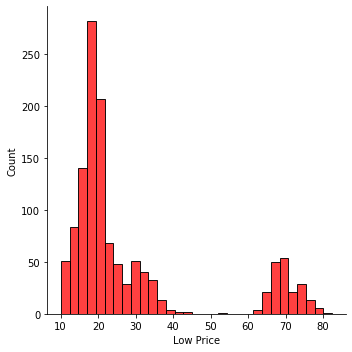

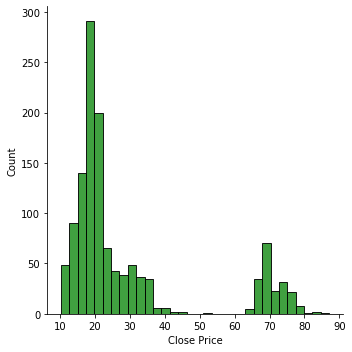

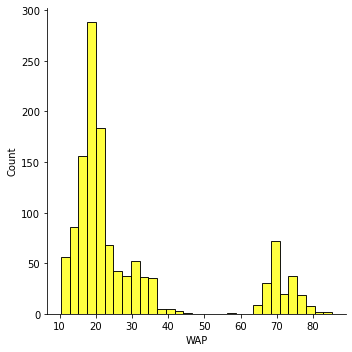

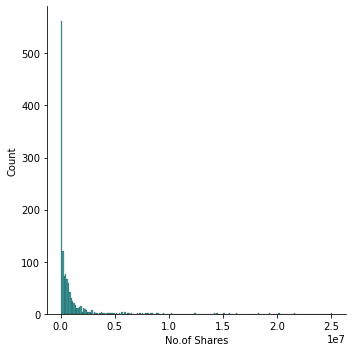

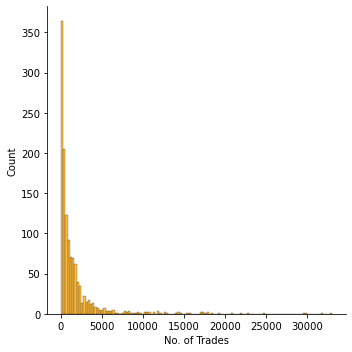

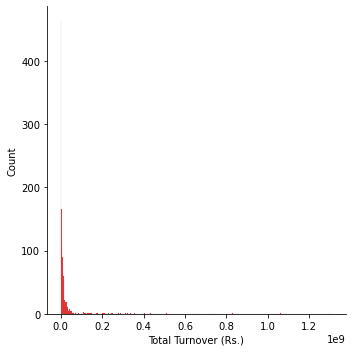

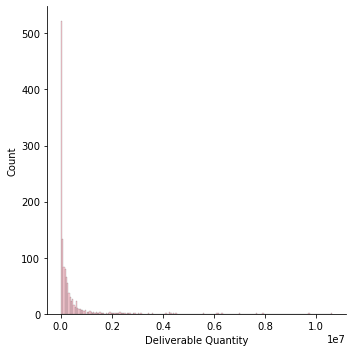

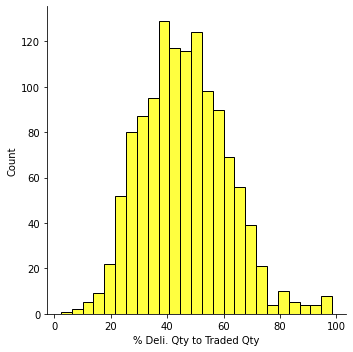

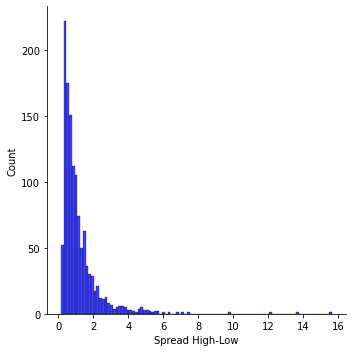

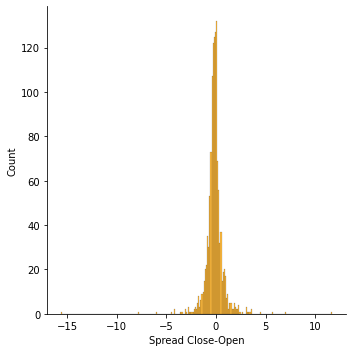

In [12]:
sns.displot(df['Open Price'])
sns.displot(df['High Price'],color='pink')
sns.displot(df['Low Price'],color='red')
sns.displot(df['Close Price'],color='green')
sns.displot(df['WAP'],color='yellow')
sns.displot(df['No.of Shares'],color='teal')
sns.displot(df['No. of Trades'],color = 'orange')
sns.displot(df['Total Turnover (Rs.)'],color = 'red')
sns.displot(df['Deliverable Quantity'],color = 'pink')
sns.displot(df['% Deli. Qty to Traded Qty'],color = 'yellow')
sns.displot(df['Spread High-Low'],color = 'blue')
sns.displot(df['Spread Close-Open'],color = 'orange')


plt.show()

In [42]:
df.head(1)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,1.12.17,79.75,81.0,78.2,78.85,79.468121,84508,413,6715692,27668.0,32.74,2.8,-0.9


In [43]:
x=df[['High Price','Low Price','Close Price','No.of Shares','No. of Trades']]
x.head()

,High Price,Low Price,Close Price,No.of Shares,No. of Trades
0,81.00,78.2,78.85,84508,413
1,80.00,78.1,78.25,26121,203
2,78.35,77.0,77.50,37016,308
3,78.30,77.0,77.35,37926,257
4,80.60,77.0,78.55,141599,1023


In [30]:
y=df[['Open Price']]
y.head()

,Open Price
0,79.75
1,80.00
2,78.00
3,77.75
4,77.85


In [44]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [59]:
x_train

,High Price,Low Price,Close Price,No.of Shares,No. of Trades
195,67.25,66.30,66.90,4704,66
206,41.25,39.50,40.35,106668,874
22,78.30,74.20,75.75,289526,1990
30,75.60,74.00,74.75,42365,259
1144,18.20,17.90,18.00,114717,731
...,...,...,...,...,...
1158,18.80,18.25,18.35,209812,678
600,15.50,14.90,15.10,47456,210
391,21.45,20.75,20.85,104181,381
231,33.10,31.90,32.40,119366,672


In [60]:
x_test

,High Price,Low Price,Close Price,No.of Shares,No. of Trades
269,36.95,35.70,35.85,117006,460
415,20.60,18.35,20.05,408214,1773
461,17.55,16.85,17.35,77635,380
370,25.60,24.95,25.30,105880,352
300,28.70,28.15,28.65,139198,85
...,...,...,...,...,...
189,67.95,67.25,67.55,8439,83
325,33.10,31.95,32.05,82489,296
201,46.00,42.25,43.80,249937,1844
213,28.85,27.00,28.65,478485,2144


In [61]:
y_train

,Open Price
195,66.30
206,41.10
22,75.50
30,74.00
1144,17.90
...,...
1158,18.35
600,15.00
391,20.85
231,32.70


In [62]:
y_test

,Open Price
269,36.50
415,18.50
461,16.85
370,25.00
300,28.60
...,...
189,67.60
325,32.95
201,45.00
213,27.00


In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr=LinearRegression()
lr

LinearRegression()

In [65]:
lr.fit(x_train,y_train)

LinearRegression()

In [66]:
# pred=lr.predict([[75.00,72.75,74.70,83909.677]])
# pred

In [67]:
pred=lr.predict(x_test)
pred[0:5]


array([[36.59235825],
       [19.17178937],
       [17.13952886],
       [25.27389692],
       [28.29972122]])

In [68]:
from sklearn.metrics import mean_squared_error

In [70]:
score=mean_squared_error(y_test,pred)
print("The mean Absolute Error of our Model is {}".format(round(score,2)))
# score

The mean Absolute Error of our Model is 0.28
